# Determining absolute hydration free energy offsets

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Global-variables" data-toc-modified-id="Global-variables-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Global variables</a></span></li><li><span><a href="#Feature-generation" data-toc-modified-id="Feature-generation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Feature generation</a></span><ul class="toc-item"><li><span><a href="#Descriptors" data-toc-modified-id="Descriptors-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Descriptors</a></span></li><li><span><a href="#Fingerprints" data-toc-modified-id="Fingerprints-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Fingerprints</a></span></li><li><span><a href="#Compile-features" data-toc-modified-id="Compile-features-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Compile features</a></span></li><li><span><a href="#Remove-columns-with-string-values" data-toc-modified-id="Remove-columns-with-string-values-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Remove columns with string values</a></span></li><li><span><a href="#Convert-all-values-to-float" data-toc-modified-id="Convert-all-values-to-float-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Convert all values to float</a></span></li><li><span><a href="#Normalise-data" data-toc-modified-id="Normalise-data-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Normalise data</a></span></li><li><span><a href="#Perform-PCA-on-features-alone" data-toc-modified-id="Perform-PCA-on-features-alone-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Perform PCA on features alone</a></span></li><li><span><a href="#Recover-top-PCs" data-toc-modified-id="Recover-top-PCs-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Recover top PCs</a></span></li></ul></li><li><span><a href="#Label-generation" data-toc-modified-id="Label-generation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Label generation</a></span></li><li><span><a href="#Training-and-testing-set-generation" data-toc-modified-id="Training-and-testing-set-generation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Training and testing set generation</a></span><ul class="toc-item"><li><span><a href="#Full-dataset" data-toc-modified-id="Full-dataset-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Full dataset</a></span></li><li><span><a href="#Training-set" data-toc-modified-id="Training-set-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Training set</a></span><ul class="toc-item"><li><span><a href="#CSV" data-toc-modified-id="CSV-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>CSV</a></span></li><li><span><a href="#SDF" data-toc-modified-id="SDF-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>SDF</a></span></li></ul></li><li><span><a href="#Testing-set" data-toc-modified-id="Testing-set-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Testing set</a></span><ul class="toc-item"><li><span><a href="#CSV" data-toc-modified-id="CSV-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>CSV</a></span></li><li><span><a href="#SDF" data-toc-modified-id="SDF-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>SDF</a></span></li></ul></li></ul></li><li><span><a href="#Training" data-toc-modified-id="Training-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Training</a></span><ul class="toc-item"><li><span><a href="#Perform-5-fold-cross-validation" data-toc-modified-id="Perform-5-fold-cross-validation-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Perform 5-fold cross-validation</a></span></li><li><span><a href="#Start-log-file" data-toc-modified-id="Start-log-file-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Start log file</a></span></li><li><span><a href="#Define-SVR" data-toc-modified-id="Define-SVR-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Define SVR</a></span></li><li><span><a href="#Train-SVR" data-toc-modified-id="Train-SVR-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Train SVR</a></span></li><li><span><a href="#Write-SVR-statistic-outputs" data-toc-modified-id="Write-SVR-statistic-outputs-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Write SVR statistic outputs</a></span></li><li><span><a href="#Plot-convergence" data-toc-modified-id="Plot-convergence-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>Plot convergence</a></span></li></ul></li><li><span><a href="#External-testing" data-toc-modified-id="External-testing-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>External testing</a></span><ul class="toc-item"><li><span><a href="#Per-SVR-model" data-toc-modified-id="Per-SVR-model-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Per SVR model</a></span></li><li><span><a href="#Averaged-over-all-models" data-toc-modified-id="Averaged-over-all-models-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Averaged over all models</a></span></li></ul></li><li><span><a href="#Corrected-hydration-free-energies" data-toc-modified-id="Corrected-hydration-free-energies-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Corrected hydration free energies</a></span></li><li><span><a href="#Determining-high-absolute-errors" data-toc-modified-id="Determining-high-absolute-errors-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Determining high absolute errors</a></span><ul class="toc-item"><li><span><a href="#Tanimoto-Coefficient" data-toc-modified-id="Tanimoto-Coefficient-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Tanimoto Coefficient</a></span></li><li><span><a href="#Absolute-error-<-1.00" data-toc-modified-id="Absolute-error-<-1.00-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Absolute error &lt; 1.00</a></span></li><li><span><a href="#1.00-<-absolute-error-<-2.00" data-toc-modified-id="1.00-<-absolute-error-<-2.00-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>1.00 &lt; absolute error &lt; 2.00</a></span></li><li><span><a href="#Absolute-error->-2.00" data-toc-modified-id="Absolute-error->-2.00-9.4"><span class="toc-item-num">9.4&nbsp;&nbsp;</span>Absolute error &gt; 2.00</a></span></li></ul></li></ul></div>

## Imports

In [1]:
# General:
import pandas as pd
import numpy as np
import os
import csv
import subprocess
import time
import shutil
import glob
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
import seaborn as sns
import statistics
import pickle

# SciKit-Optimise:
import skopt
from skopt import gp_minimize, forest_minimize
from skopt.space import Real, Categorical, Integer
from skopt.plots import plot_convergence
from skopt.plots import plot_objective, plot_evaluations
from skopt.utils import use_named_args

# SVM:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# RDKit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem import rdmolfiles, rdMolDescriptors
from rdkit.Chem import SDMolSupplier, Descriptors, Crippen, Lipinski, Fragments

# Misc.:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from scipy import stats
import statistics
import pickle
from mordred import Calculator, descriptors

/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


## Global variables

In [2]:
from distutils.dir_util import copy_tree

absolute_dGoffset_path = './absolute_dGoffset_FEAT_only/'

if not os.path.isdir(absolute_dGoffset_path):
    os.mkdir(absolute_dGoffset_path)

if not os.path.isdir(absolute_dGoffset_path + 'features_X/'):
    os.mkdir(absolute_dGoffset_path + 'features_X/')

if not os.path.isdir(absolute_dGoffset_path + 'labels_y/'):
    os.mkdir(absolute_dGoffset_path + 'labels_y/')




copy_tree('./absolute_dGoffset/features_X/mordred_descriptors/', 
            absolute_dGoffset_path + 'features_X/mordred_descriptors/')

['./absolute_dGoffset_FEAT_only/features_X/mordred_descriptors/all_descriptors.txt',
 './absolute_dGoffset_FEAT_only/features_X/mordred_descriptors/used_descriptors.txt',
 './absolute_dGoffset_FEAT_only/features_X/mordred_descriptors/discarded_descriptors.txt',
 './absolute_dGoffset_FEAT_only/features_X/mordred_descriptors/used_descriptors_descriptions.csv']

In [3]:
# dataset_path = '~/Dropbox/FreeSolv/dGlearn-FreeSolv-master/datasets/train_compiled/dGhydr_train.csv'
offset_col_name = 'dGoffset (kcal/mol)'

# set data processing configurations:
PCA_threshold = 0.95  # Keeps n dimensions for x variance explained
replicates = 30  # Number of replicates per subject model
n_calls = 40  # Number of Bayesian optimisation loops for hyperparameter optimisation, 40 is best for convergence, > 60 scales to very expensive
startpoint_BO = np.inf  # Point to consider top-performing model from (MAE/MAD); 1.0 = no improvement on test-set variance
ensemble_size = 10  # Amount of top-scoring models to retain per fold-dataset combination
# KFold parameters:
n_splits = 5  # Number of K-fold splits
random_state = 2  # Random number seed

split = 'dG(hydr)'
translated_subject = 'absolute'

In [4]:
def plot_scatter(dataframe, x_info, y_info, title, MAE):
    """x and y info are lists with fomrat [datatframe_index, axis label]."""
    
    # x and y data
    x = dataframe.iloc[:, x_info[0]]
    y = dataframe.iloc[:, y_info[0]]
    
    # plot scatter
    plt.scatter(x, y, 
                color='black', 
                s=8)
    
    # plot line of best fit
    # https://stackoverflow.com/questions/22239691/code-for-best-fit-straight-line-of-a-scatter-plot-in-python
    plt.plot(np.unique(x), 
             np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), 
             color='black', 
             linewidth=1)
    
    # axis labels
    plt.xlabel(x_info[1])
    plt.ylabel(y_info[1])
    
    plt.title(title)
    
    # R-squared
    r2 = r2_score(x, y)
    
    # MAE
    # MAE = mean_squared_error(x, y)
    
    # annotate with r-squared and MAE
    string = 'R-squared = {}\nMAE = {}'.format(round(r2, 4), round(MAE, 4))
    plt.annotate(string, 
                 xy=(0, 1), 
                 xytext=(12, -12), 
                 va='top', 
                 xycoords='axes fraction', 
                 textcoords='offset points')

## Feature generation
### Descriptors
- Open user-specified descriptors and create list.
- Consult http://mordred-descriptor.github.io/documentation/master/descriptors.html.
- All descriptors have been used.

In [5]:
descriptors_raw = open(absolute_dGoffset_path + 'features_X/mordred_descriptors/all_descriptors.txt', 'r')
descriptors_raw_list = [line.split('\n') for line in descriptors_raw.readlines()]
descriptors_list = [desc[0] for desc in descriptors_raw_list]

print('Number of descriptors:', str(len(descriptors_list)))

Number of descriptors: 1825


- Load in all FreeSolve SDF files.
- Calculate all descriptors.

In [6]:
# set up feature calculator
print("Generating features...")
calc = Calculator(descriptors, ignore_3D=False)

# Supply SDF
SDF_dr = './datasets/sdffiles/'
suppl = [sdf for sdf in glob.glob(SDF_dr + '*.sdf')]

# Empty DataFrame containing only descriptor names as headings
# mordred_df = pd.DataFrame(columns=descriptors_list)
mordred_df = pd.read_csv('./absolute_dGoffset/features_X/mordred_descriptor_output/mordred_descriptors.csv'
)

# ID_lst = []

# for mol in suppl:
#     ID = mol.strip(SDF_dr)
#     ID_lst.append(ID)
#     feat = calc.pandas(Chem.SDMolSupplier(mol))
#     mordred_df = mordred_df.append(feat, ignore_index=True, sort=False)

Generating features...


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (16,126,127,128,129,130,131,132,133,134,225,226,227,333,334,335,336,337,338,339,340,341,441,442,443,522,523,538,539,618,619,634,635,664,665,679,692,705,718,731,744,757,770,859,867,868,875,883,884,932,1275,1276,1277,1278,1299,1300,1349,1765,1793,1794,1796,1824) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
# if not os.path.isdir(absolute_dGoffset_path + 'features_X/mordred_descriptor_output/'):
#     os.mkdir(absolute_dGoffset_path + 'features_X/fingerprints_output/')

# # Insert IDs as new column with column index = 0
# mordred_df.insert(0, 'ID', ID_lst)
# mordred_df

# mordred_save_loc = absolute_dGoffset_path + 'features_X/mordred_descriptor_output/mordred_descriptors.csv'

# if os.path.exists(mordred_save_loc):
#     os.remove(mordred_save_loc)
#     mordred_df.to_csv(path_or_buf=mordred_save_loc, index=False)
#     print('Existing file overwritten.')
# else:
#     mordred_df.to_csv(path_or_buf=mordred_save_loc, index=False)

# print('Completed writing all calculated mordred descriptors to CSV.')

### Fingerprints

In [8]:
# FP_table = []

# for sdf in glob.glob(SDF_dr + '*.sdf'):
    
#     FP_row = []
    
#     # Append ligand ID
#     FP_row.append(sdf.strip(SDF_dr).strip('*.sdf'))
    
#     # Setup fingerprint
#     mol = Chem.rdmolfiles.SDMolSupplier(sdf)[0]
#     mol.UpdatePropertyCache(strict=False)
    
#     # Calculate fingerprint
#     FP = rdMolDescriptors.GetHashedAtomPairFingerprint(mol, 256)
#     for x in list(FP):
#         FP_row.append(x)
    
#     FP_table.append(FP_row)

# # Column names
# ID_col = ['ID']
# FP_col = np.arange(0, 256).tolist()
# FP_col = [ID_col.append("pfp" + str(item)) for item in FP_col]

# FP_df = pd.DataFrame(FP_table, columns=ID_col)
# FP_df

# # Save to CSV
# FP_save_loc = absolute_dGoffset_path + 'features_X/fingerprints_output/fingerprints.csv'

# if os.path.exists(FP_save_loc):
#     os.remove(FP_save_loc)
#     FP_df.to_csv(path_or_buf=FP_save_loc, index=False)
#     print('Existing file overwritten.')
# else:
#     FP_df.to_csv(path_or_buf=FP_save_loc, index=False)

# print('Completed writing all calculated fingerprints to CSV.')

### Compile features

In [9]:
compiled_X_df = mordred_df
# compiled_X_df = compiled_X_df.join(FP_df.set_index('ID'), on='ID')
# compiled_df = compiled_df.set_index('ID')
compiled_X_df

,ID,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,PBF
0,mobley_5852491,4.352030,4.429961,0,0,7.465883,2.114908,3.975713,7.465883,1.244314,...,44.534727,84.093900,4.671883,26,2,26.0,27.0,2.111111111111111,1.416667,1.576244e-01
1,mobley_9838013,4.012290,4.284816,0,0,5.818626,2.074313,4.148627,5.818626,0.969771,...,31.665095,88.088815,4.893823,28,3,24.0,22.0,4.3125,1.375000,1.705255e-01
2,mobley_2410897,1.414214,1.414214,0,1,2.828427,1.414214,2.828427,2.828427,0.942809,...,17.310771,45.057849,4.505785,4,0,6.0,4.0,2.25,1.000000,8.799730e-02
3,mobley_1893815,4.012290,4.284816,0,0,5.818626,2.074313,4.148627,5.818626,0.969771,...,31.665095,165.891061,20.736383,28,3,24.0,22.0,4.3125,1.375000,5.848740e-01
4,mobley_2008055,0.000000,0.000000,0,0,2.000000,1.000000,2.000000,2.000000,1.000000,...,7.493061,30.046950,3.755869,1,0,2.0,1.0,2.0,1.000000,3.361027e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,mobley_4149784,12.865821,9.994335,0,0,21.056081,2.438426,4.876853,21.056081,1.316005,...,49.022950,251.974485,11.453386,414,25,88.0,104.0,4.66667,3.388889,2.726368e-04
638,mobley_6497672,2.828427,3.146264,0,0,5.464102,1.732051,3.464102,5.464102,1.092820,...,25.583106,70.041865,6.367442,20,2,14.0,12.0,2.75,1.500000,1.585811e-04
639,mobley_9534740,8.761080,8.651650,0,0,14.708146,2.377683,4.755367,14.708146,1.225679,...,42.927926,180.063388,7.502641,182,19,58.0,68.0,6.05556,2.777778,4.631200e-01
640,mobley_3980099,6.611250,6.419894,0,0,10.891331,2.263821,4.527642,10.891331,1.210148,...,37.975562,179.930033,14.994169,82,11,42.0,47.0,4.08333,2.055556,1.018227e-04


In [10]:
# Save to 
if not os.path.isdir(absolute_dGoffset_path + 'features_X/tmp/'):
    os.mkdir(absolute_dGoffset_path + 'features_X/tmp/')
tmp_compiled_X = absolute_dGoffset_path + 'features_X/tmp/compiled_data.csv'

if os.path.exists(tmp_compiled_X):
    os.remove(tmp_compiled_X)
    compiled_X_df.to_csv(path_or_buf=tmp_compiled_X, index=False)
    print('Existing file overwritten.')
else:
    compiled_X_df.to_csv(path_or_buf=tmp_compiled_X, index=False)

print('Completed writing temporary compiled features to CSV.')

Completed writing temporary compiled features to CSV.


### Remove columns with string values

In [11]:
def check_dataframe_is_numeric(dataframe):
    """Iterate over all columns and check if numeric.

    Returns:
    New DataFrame with removed"""

    columns_dropped = 0
    columns_dropped_lst = []

    for col in dataframe.columns:
        for index, x in zip(dataframe.index, dataframe.loc[:, col]):
            try:
                float(x)
            except ValueError:
                columns_dropped_lst.append([col, index, x])
                columns_dropped += 1
                dataframe = dataframe.drop(columns=col)
                break

    print('Number of columns dropped:', (columns_dropped))
    return dataframe, columns_dropped_lst


tmp_compiled_df = pd.read_csv(tmp_compiled_X, index_col='ID')
numeric_X, columns_dropped = check_dataframe_is_numeric(tmp_compiled_df)
numeric_X

Number of columns dropped: 712


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2,PBF
ID,,,,,,,,,,,,,,,,,,,,,
mobley_5852491,4.352030,4.429961,0,0,7.465883,2.114908,3.975713,7.465883,1.244314,2.707505,...,7.788626,44.534727,84.093900,4.671883,26,2,26.0,27.0,1.416667,1.576244e-01
mobley_9838013,4.012290,4.284816,0,0,5.818626,2.074313,4.148627,5.818626,0.969771,2.626363,...,7.989899,31.665095,88.088815,4.893823,28,3,24.0,22.0,1.375000,1.705255e-01
mobley_2410897,1.414214,1.414214,0,1,2.828427,1.414214,2.828427,2.828427,0.942809,1.849457,...,4.174387,17.310771,45.057849,4.505785,4,0,6.0,4.0,1.000000,8.799730e-02
mobley_1893815,4.012290,4.284816,0,0,5.818626,2.074313,4.148627,5.818626,0.969771,2.626363,...,7.989899,31.665095,165.891061,20.736383,28,3,24.0,22.0,1.375000,5.848740e-01
mobley_2008055,0.000000,0.000000,0,0,2.000000,1.000000,2.000000,2.000000,1.000000,1.407606,...,1.098612,7.493061,30.046950,3.755869,1,0,2.0,1.0,1.000000,3.361027e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mobley_4149784,12.865821,9.994335,0,0,21.056081,2.438426,4.876853,21.056081,1.316005,3.733857,...,9.831830,49.022950,251.974485,11.453386,414,25,88.0,104.0,3.388889,2.726368e-04
mobley_6497672,2.828427,3.146264,0,0,5.464102,1.732051,3.464102,5.464102,1.092820,2.390167,...,6.192362,25.583106,70.041865,6.367442,20,2,14.0,12.0,1.500000,1.585811e-04
mobley_9534740,8.761080,8.651650,0,0,14.708146,2.377683,4.755367,14.708146,1.225679,3.384121,...,9.396405,42.927926,180.063388,7.502641,182,19,58.0,68.0,2.777778,4.631200e-01


- Columns dropped with respective ID index at infringing non-numeric value. The non-numeric value is also shown.
- Note: only one non-numeric value per column is detailed.

In [12]:
dropped_col_df = pd.DataFrame(columns_dropped, columns=['column dropped', 'at ID', 'non-numeric value'])
dropped_col_df

,column dropped,at ID,non-numeric value
0,VR3_A,mobley_5631798,divide by zero encountered in log (VR3_A/VR3)
1,ATS0s,mobley_5631798,missing intrinsic state for ['N'] (ATS0s/Props)
2,ATS1s,mobley_5631798,missing intrinsic state for ['N'] (ATS0s/Props)
3,ATS2s,mobley_5631798,missing intrinsic state for ['N'] (ATS0s/Props)
4,ATS3s,mobley_5631798,missing intrinsic state for ['N'] (ATS0s/Props)
...,...,...,...
707,TopoShapeIndex,mobley_5631798,invalid value encountered in double_scalars (T...
708,PetitjeanIndex,mobley_5631798,invalid value encountered in double_scalars (P...
709,Vabc,mobley_664966,unknown atom type (Vabc)
710,VAdjMat,mobley_5631798,divide by zero encountered in log2 (VAdjMat)


In [13]:
# Save to CSV
dropped_col_save_loc = absolute_dGoffset_path + 'features_X/dropped_features.csv'

if os.path.exists(dropped_col_save_loc):
    os.remove(dropped_col_save_loc)
    dropped_col_df.to_csv(path_or_buf=dropped_col_save_loc, index=False)
    print('Existing file overwritten.')
else:
    dropped_col_df.to_csv(path_or_buf=dropped_col_save_loc, index=False)

print('Completed writing dropped columns to CSV.')

Completed writing dropped columns to CSV.


### Convert all values to float

In [14]:
float_X = numeric_X.apply(pd.to_numeric).astype(float).sample(frac=1)
float_X = float_X.rename(columns={'dGhydr (kcal/mol)': 'dGoffset (kcal/mol)'})
float_X

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2,PBF
ID,,,,,,,,,,,,,,,,,,,,,
mobley_852937,5.875634,5.525875,0.0,0.0,9.924777,2.170086,4.340173,9.924777,1.240597,2.979730,...,8.463159,35.730685,112.032443,8.617880,62.0,7.0,36.0,38.0,1.833333,0.000127
mobley_3183805,6.651690,6.355891,0.0,0.0,10.792280,2.245827,4.491654,10.792280,1.199142,3.099448,...,8.806724,37.839725,120.093900,5.718757,84.0,10.0,42.0,46.0,2.027778,0.000272
mobley_4639255,2.121320,2.340100,0.0,0.0,4.472136,1.618034,3.236068,4.472136,1.118034,2.155909,...,5.509388,22.328143,62.036779,6.203678,10.0,1.0,10.0,8.0,1.250000,0.091619
mobley_3274817,12.474954,12.009296,4.0,0.0,20.064146,2.416640,4.833280,20.064146,1.180244,3.721503,...,9.679406,49.515241,240.076816,8.278511,486.0,27.0,82.0,95.0,3.888889,0.337022
mobley_2493732,2.449490,2.449490,0.0,0.0,3.464102,1.732051,3.464102,3.464102,0.866025,2.178059,...,6.188264,24.179697,95.953355,15.992226,9.0,0.0,12.0,9.0,1.000000,0.000186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mobley_2864987,3.754314,4.057055,0.0,0.0,6.155367,1.902113,3.804226,6.155367,1.025895,2.595100,...,7.131699,29.439488,88.088815,4.893823,32.0,3.0,20.0,18.0,1.583333,0.088281
mobley_3234716,5.875634,5.525875,0.0,0.0,9.924777,2.170086,4.340173,9.924777,1.240597,2.979730,...,8.463159,35.730685,106.078250,5.893236,62.0,7.0,36.0,38.0,1.833333,0.000265
mobley_9740891,7.208967,7.079362,0.0,0.0,11.981410,2.288246,4.576491,11.981410,1.198141,3.198086,...,8.987322,39.451939,170.964254,13.151096,112.0,13.0,46.0,52.0,2.388889,0.000467


### Normalise data

In [15]:
def normalise_and_split_datasets(dataframe):

    # Calculate statistics, compute Z-scores, clean:
    print('Normalising...')
    stats = dataframe.describe()
    stats = stats.transpose()

    def norm(x):
        return (x - stats['mean']) / stats['std']

    # Normalise and return separately:
    normed_data = norm(dataframe).fillna(0).replace([np.inf, -np.inf], 0.0)

    return normed_data


normalised_X = normalise_and_split_datasets(float_X)
normalised_X

Normalising...


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2,PBF
ID,,,,,,,,,,,,,,,,,,,,,
mobley_852937,-0.066053,-0.121189,-0.262213,-0.205174,-0.073498,0.373179,0.402186,-0.073498,0.622122,0.137438,...,0.384255,0.019533,-0.367538,0.063127,-0.377284,-0.215875,-0.058653,-0.069647,-0.328710,-0.874472
mobley_3183805,0.158412,0.157383,-0.262213,-0.205174,0.083781,0.607029,0.637948,0.083781,0.338920,0.358820,...,0.588639,0.225029,-0.255963,-0.513630,-0.258838,0.116479,0.183761,0.187326,-0.106479,-0.873650
mobley_4639255,-1.151944,-1.190404,-0.262213,-0.205174,-1.062069,-1.331296,-1.316225,-1.062069,-0.215179,-1.385979,...,-1.372928,-1.286349,-1.059506,-0.417159,-0.657247,-0.880584,-1.109111,-1.033297,-0.995401,-0.354384
mobley_3274817,1.842722,2.054790,5.972629,-0.205174,1.764782,1.134418,1.169649,1.764782,0.209814,1.509130,...,1.107794,1.362638,1.404668,-0.004388,1.905491,1.999821,1.799852,1.761288,2.020583,1.040609
mobley_2493732,-1.057025,-1.153691,-0.262213,-0.205174,-1.244827,-0.979267,-0.961317,-1.244827,-1.936798,-1.345018,...,-0.969068,-1.105943,-0.590082,1.530193,-0.662631,-0.991369,-1.028307,-1.001175,-1.281125,-0.874136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mobley_2864987,-0.679620,-0.614157,-0.262213,-0.205174,-0.756897,-0.454195,-0.431953,-0.756897,-0.844638,-0.573824,...,-0.407824,-0.593452,-0.698931,-0.677744,-0.538801,-0.659014,-0.705089,-0.712080,-0.614434,-0.373357
mobley_3234716,-0.066053,-0.121189,-0.262213,-0.205174,-0.073498,0.373179,0.402186,-0.073498,0.622122,0.137438,...,0.384255,0.019533,-0.449947,-0.478919,-0.377284,-0.215875,-0.058653,-0.069647,-0.328710,-0.873685
mobley_9740891,0.319598,0.400196,-0.262213,-0.205174,0.299372,0.737998,0.769988,0.299372,0.332079,0.541224,...,0.696076,0.382115,0.448111,0.964973,-0.108089,0.448834,0.345370,0.380056,0.306234,-0.872542


### Perform PCA on features alone

In [16]:
def reduce_features(normalised_collection, pca_threshold):

    print('Computing PCA, reducing features up to ' + str(round(pca_threshold * 100, 5)) + '% VE...')
    training_data = normalised_collection

    # Initialise PCA object, keep components up to x% variance explained:
    PCA.__init__
    pca = PCA(n_components=pca_threshold)

    # Fit to and transform training set:
    train_post_pca = pd.DataFrame(pca.fit_transform(training_data))
    
    # Reset column names to PCX
    PCA_col = np.arange(1, len(train_post_pca.columns) + 1).tolist()
    PCA_col = ['PC' + str(item) for item in PCA_col]
    train_post_pca.columns = PCA_col
    train_post_pca.index = training_data.index

    print('Number of PCA features after reduction: ' + str(len(train_post_pca.columns)))

    # pickle pca object to file so that external test sets can be transformed accordingly
    # (see https://stackoverflow.com/questions/42494084/saving-large-data-set-pca-on-disk
    # -for-later-use-with-limited-disc-space)
    # pickle.dump(pca, open('./opt_output/pca_trainingset.p', 'wb'))
    
    return train_post_pca  # return list with test_post_pca when needed


reduced_X = reduce_features(normalised_X, PCA_threshold)
reduced_X

Computing PCA, reducing features up to 95.0% VE...
Number of PCA features after reduction: 66


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66
ID,,,,,,,,,,,,,,,,,,,,,
mobley_852937,-3.094383,8.905457,-3.354852,-9.068081,-2.023958,1.152171,-1.166012,-2.432661,-2.905993,2.125247,...,0.583812,0.562993,0.072913,0.101691,-0.216870,0.223573,-0.545166,2.528996,1.333843,-0.719807
mobley_3183805,0.556475,-6.767980,-6.162418,-5.576986,2.596137,1.366197,-5.176924,0.462227,7.380083,-0.585937,...,-0.961320,-0.083864,0.369959,-0.040951,0.900261,-1.419084,-0.333178,0.000012,0.840917,-1.381201
mobley_4639255,-19.483899,4.597675,6.709897,0.835374,0.565998,-1.786246,8.369428,-2.650572,-4.577636,-0.819509,...,0.361776,0.231911,0.179193,0.349260,2.052741,-0.829242,-0.319387,-0.287771,-1.180121,0.796352
mobley_3274817,37.014377,5.689782,16.453693,-3.050417,-17.507468,17.299745,2.600274,3.705545,4.581253,2.317258,...,-1.201880,-3.715700,0.625781,2.582005,-2.177603,0.590640,-2.220717,-3.060789,1.075292,2.498728
mobley_2493732,-18.269293,10.687267,-3.839502,3.730994,-2.197898,-2.375616,-2.113803,2.137948,5.940003,-2.099120,...,-2.181506,1.391845,-1.694261,2.855435,1.537499,-0.975736,-0.240957,0.609176,-0.609151,1.205136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mobley_2864987,-10.594256,-4.665681,3.621002,0.032358,1.201191,2.035053,-0.395283,-0.088470,-2.434903,0.458539,...,0.577241,0.883130,0.311942,-1.117875,-0.451222,0.596641,-0.599247,0.411129,-0.406642,0.486255
mobley_3234716,-3.848298,-5.175397,-6.767402,-5.069444,1.468888,1.349527,-3.126129,-0.646880,6.191807,-1.320173,...,-0.844920,-0.781251,-0.376189,0.878883,1.239707,-1.699418,0.355824,-0.003483,0.999086,-0.775088
mobley_9740891,2.700169,8.320408,-11.120492,-5.346960,-3.185898,-0.353106,-1.947743,0.760519,-0.621204,-1.404733,...,0.249865,0.390213,0.876533,-0.586662,-0.521706,0.387197,0.746580,-0.596011,0.511102,-0.724771


### Recover top PCs
Adapted from:
https://stackoverflow.com/questions/22984335/recovering-features-names-of-explained-variance-ratio-in-pca-with-sklearn

In [17]:
def recovery_pc(normalised_collection, pca_threshold):

    print('Computing PCA, reducing features up to ' + str(round(pca_threshold * 100, 5)) + '% VE...')
    training_data = normalised_collection
    
    # normalise data
    data_scaled = pd.DataFrame(preprocessing.scale(training_data),columns = training_data.columns) 
    
    # Initialise PCA object, keep components up to x% variance explained:
    PCA.__init__
    pca = PCA(n_components=pca_threshold)
    pca.fit_transform(data_scaled)

    index = list(range(1, len(reduced_X.columns) + 1))
    index = ['PC{}'.format(x) for x in index]
    
    return_df = pd.DataFrame(pca.components_,columns=data_scaled.columns, index=index)
    
    return return_df


recovered_pc = recovery_pc(normalised_X, PCA_threshold)
recovered_pc

Computing PCA, reducing features up to 95.0% VE...


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2,PBF
PC1,0.055637,0.055887,0.016215,-0.004754,0.055292,0.043584,0.043870,0.055292,0.027247,5.242256e-02,...,0.044317,0.050195,0.049927,0.005591,0.052523,0.053247,0.054779,0.053628,0.055360,0.028601
PC2,0.004913,0.005383,0.028089,-0.018897,-0.003213,0.011648,0.011942,-0.003213,-0.026431,-2.508238e-03,...,0.008560,0.002819,0.023147,0.075441,0.001299,0.013395,0.010003,0.012570,-0.010090,0.018982
PC3,-0.014911,-0.005790,0.052319,0.009225,-0.016903,-0.022989,-0.021423,-0.016903,-0.041399,-1.258760e-02,...,-0.018143,-0.016058,-0.025373,-0.044425,0.004340,-0.021551,-0.020206,-0.025436,0.002187,0.030035
PC4,-0.009537,-0.006578,-0.009909,0.007408,-0.012169,-0.046218,-0.047725,-0.012169,-0.061838,-3.383243e-02,...,-0.047408,-0.022263,0.046461,0.069088,0.028633,0.004779,-0.006850,-0.004804,0.000413,0.049597
PC5,0.005897,0.012704,-0.085813,0.012812,-0.002134,0.047215,0.042590,-0.002134,-0.005663,2.033250e-02,...,0.043781,0.036191,-0.006384,-0.029779,-0.024522,0.012783,0.011813,0.016021,-0.010697,0.041682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PC62,0.001296,0.001353,0.005604,-0.093396,0.001757,0.000981,-0.003609,0.001757,-0.026909,2.186876e-03,...,-0.001375,0.009671,-0.000606,-0.006751,-0.003888,0.013317,0.004919,0.005085,0.010280,-0.032376
PC63,0.002838,0.005716,-0.035169,-0.060864,0.002344,0.000728,0.002227,0.002344,-0.018400,6.101294e-03,...,0.011644,0.016596,-0.001758,0.001465,-0.002205,-0.010516,0.001346,-0.000289,-0.003615,-0.003144
PC64,-0.005340,-0.007886,-0.001435,0.002727,-0.009103,0.005912,0.007034,-0.009103,-0.024586,-5.924243e-03,...,0.004854,-0.005393,-0.001381,0.003229,0.000898,0.005153,-0.003608,-0.001597,-0.007716,-0.071126
PC65,-0.002263,-0.004685,-0.006308,0.151806,-0.005387,-0.018665,-0.016578,-0.005387,-0.028912,5.468263e-03,...,-0.016896,-0.002682,0.001696,-0.004895,-0.010704,-0.009670,-0.006470,-0.007769,0.005814,-0.049117


In [18]:
# list of column names with highest value in each row
recovered_pc_max = recovered_pc.idxmax(axis=1)

# recovery 'PCX' indexing
pc_index = recovered_pc_max.index.tolist()

# write feature names to list
pc_feature = recovered_pc_max.values.tolist()

# write to df
recovered_pc_dict = {'PCX': pc_index, 'Highest contributing feature': pc_feature}
recovered_pc_df = pd.DataFrame(recovered_pc_dict)

recovered_pc_df

,PCX,Highest contributing feature
0,PC1,nHeavyAtom
1,PC2,Mpe
2,PC3,GATS1p
3,PC4,AETA_eta
4,PC5,NssssC
...,...,...
61,PC62,nG12FaRing
62,PC63,nG12FaRing
63,PC64,SsssN
64,PC65,nG12FaRing


In [19]:
# Save to CSV
recov_pc_save_loc = absolute_dGoffset_path + 'recovered_PCs.csv'

if os.path.exists(recov_pc_save_loc):
    os.remove(recov_pc_save_loc)
    recovered_pc_df.to_csv(path_or_buf=recov_pc_save_loc, index=False)
    print('Existing file overwritten.')
else:
    recovered_pc_df.to_csv(path_or_buf=recov_pc_save_loc, index=False)

print('Completed writing recovered PCs to CSV.')

Completed writing recovered PCs to CSV.


## Label generation

Complete FreeSolve database

In [20]:
# Load in FreeSolve
freesolv_loc = './datasets/database.txt'
freesolv_df = pd.read_csv(freesolv_loc, sep='; ', engine='python')
freesolv_df

,compound id (and file prefix),SMILES,iupac name (or alternative if IUPAC is unavailable or not parseable by OEChem),experimental value (kcal/mol),experimental uncertainty (kcal/mol),Mobley group calculated value (GAFF) (kcal/mol),calculated uncertainty (kcal/mol),experimental reference (original or paper this value was taken from),calculated reference,text notes.
0,mobley_1017962,CCCCCC(=O)OC,methyl hexanoate,-2.49,0.6,-3.30,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...
1,mobley_1019269,CCCCO,butan-1-ol,-4.72,0.6,-3.23,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...
2,mobley_1034539,c1cc(c(cc1c2cc(c(c(c2Cl)Cl)Cl)Cl)Cl)Cl,"1,2,3,4-tetrachloro-5-(3,4-dichlorophenyl)benzene",-3.04,0.1,-1.08,0.04,10.1007/s10822-012-9568-8,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...
3,mobley_1036761,C1CCC(CC1)N,cyclohexanamine,-4.59,0.6,-3.95,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...
4,mobley_1046331,c1ccc(cc1)OC=O,phenyl formate,-3.82,0.6,-5.44,0.03,"J. Peter Guthrie, unpublished data, as provide...",10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...
...,...,...,...,...,...,...,...,...,...,...
637,mobley_9913368,C(=C/Cl)\Cl,"(E)-1,2-dichloroethylene",-0.78,0.6,1.02,0.02,10.1021/ct050097l,10.1021/acs.jced.7b00104,"Renamed mobley_9913368 from (E)-1,2-dichloroet..."
638,mobley_9942801,CCc1ccc(cc1)C,1-ethyl-4-methyl-benzene,-0.95,0.6,-0.57,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...
639,mobley_994483,CCBr,bromoethane,-0.74,0.6,0.49,0.02,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...
640,mobley_9974966,CC(C)SC(C)C,2-isopropylsulfanylpropane,-1.21,0.6,0.14,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...


Absolute hydration free energy experimental offset values (dGoffset) were calculated using:

$$ offset=exp-calc $$

where propagation of random linear combination errors (uncertainty) were calculated using:

$$ \sigma_{offset}=\sqrt{(\sigma_{exp})^2+(\sigma_{calc})^2} $$

In [21]:
# Column names
freesolv_ID = freesolv_df.loc[:, 'compound id (and file prefix)']
exp_val = freesolv_df.loc[:, 'experimental value (kcal/mol)']
exp_err = freesolv_df.loc[:, 'experimental uncertainty (kcal/mol)']
calc_val = freesolv_df.loc[:, 'Mobley group calculated value (GAFF) (kcal/mol)']
calc_err = freesolv_df.loc[:, 'calculated uncertainty (kcal/mol)']

# New nested list containing IDs and offsets
offsets = []
for name, exp, err1, calc, err2 in zip(freesolv_ID, exp_val, exp_err, calc_val, calc_err):
    offset = exp - calc
    error = (err1**2 + err2**2)**0.5
    offsets.append([name, offset, round(error, 3)])

# Experimental offsets with uncertainties
exp_offset_with_errors_df = pd.DataFrame(offsets, columns=['ID', 'dGoffset (kcal/mol)', 'uncertainty (kcal/mol)'])

# Experimental offsets only
exp_offset = exp_offset_with_errors_df.drop(columns=['uncertainty (kcal/mol)'])
exp_offset = exp_offset.set_index('ID')
exp_offset

,dGoffset (kcal/mol)
ID,
mobley_1017962,0.81
mobley_1019269,-1.49
mobley_1034539,-1.96
mobley_1036761,-0.64
mobley_1046331,1.62
...,...
mobley_9913368,-1.80
mobley_9942801,-0.38
mobley_994483,-1.23


In [22]:
# Save to CSV
exp_offset_save_loc = absolute_dGoffset_path + 'labels_y/exp_labels.csv'

if os.path.exists(exp_offset_save_loc):
    os.remove(exp_offset_save_loc)
    exp_offset.to_csv(path_or_buf=exp_offset_save_loc, index=False)
    print('Existing file overwritten.')
else:
    exp_offset.to_csv(path_or_buf=exp_offset_save_loc, index=False)

print('Completed writing all experimental dGoffsets to CSV.')

Completed writing all experimental dGoffsets to CSV.


## Training and testing set generation

### Full dataset

In [23]:
full_dataset = pd.concat([reduced_X, exp_offset], axis=1, sort=False)
full_dataset

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,dGoffset (kcal/mol)
mobley_852937,-3.094383,8.905457,-3.354852,-9.068081,-2.023958,1.152171,-1.166012,-2.432661,-2.905993,2.125247,...,0.562993,0.072913,0.101691,-0.216870,0.223573,-0.545166,2.528996,1.333843,-0.719807,-1.23
mobley_3183805,0.556475,-6.767980,-6.162418,-5.576986,2.596137,1.366197,-5.176924,0.462227,7.380083,-0.585937,...,-0.083864,0.369959,-0.040951,0.900261,-1.419084,-0.333178,0.000012,0.840917,-1.381201,-0.06
mobley_4639255,-19.483899,4.597675,6.709897,0.835374,0.565998,-1.786246,8.369428,-2.650572,-4.577636,-0.819509,...,0.231911,0.179193,0.349260,2.052741,-0.829242,-0.319387,-0.287771,-1.180121,0.796352,-2.03
mobley_3274817,37.014377,5.689782,16.453693,-3.050417,-17.507468,17.299745,2.600274,3.705545,4.581253,2.317258,...,-3.715700,0.625781,2.582005,-2.177603,0.590640,-2.220717,-3.060789,1.075292,2.498728,-0.85
mobley_2493732,-18.269293,10.687267,-3.839502,3.730994,-2.197898,-2.375616,-2.113803,2.137948,5.940003,-2.099120,...,1.391845,-1.694261,2.855435,1.537499,-0.975736,-0.240957,0.609176,-0.609151,1.205136,-0.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mobley_2864987,-10.594256,-4.665681,3.621002,0.032358,1.201191,2.035053,-0.395283,-0.088470,-2.434903,0.458539,...,0.883130,0.311942,-1.117875,-0.451222,0.596641,-0.599247,0.411129,-0.406642,0.486255,-1.45
mobley_3234716,-3.848298,-5.175397,-6.767402,-5.069444,1.468888,1.349527,-3.126129,-0.646880,6.191807,-1.320173,...,-0.781251,-0.376189,0.878883,1.239707,-1.699418,0.355824,-0.003483,0.999086,-0.775088,-0.14
mobley_9740891,2.700169,8.320408,-11.120492,-5.346960,-3.185898,-0.353106,-1.947743,0.760519,-0.621204,-1.404733,...,0.390213,0.876533,-0.586662,-0.521706,0.387197,0.746580,-0.596011,0.511102,-0.724771,-1.39
mobley_4587267,13.877420,2.549897,13.045145,-0.770033,4.082288,0.149687,1.872874,-4.959966,-14.473448,1.438587,...,-0.765276,-1.048786,-0.412171,2.613454,-0.442993,0.063950,2.011904,0.840322,-2.507971,-5.46


In [24]:
# Save to CSV
full_dataset_save_loc = absolute_dGoffset_path + 'full_dataset.csv'

if os.path.exists(full_dataset_save_loc):
    os.remove(full_dataset_save_loc)
    full_dataset.to_csv(path_or_buf=full_dataset_save_loc, index=True)
    print('Existing file overwritten.')
else:
    full_dataset.to_csv(path_or_buf=full_dataset_save_loc, index=True)

print('Completed writing full dataset to CSV.')

Completed writing full dataset to CSV.


In [25]:
# SAMPl4_Guthrie experimental reference in FreeSolv.
SAMPL4_Guthrie_ref = 'SAMPL4_Guthrie'
# Experimental reference column name.
exp_ref_col = 'experimental reference (original or paper this value was taken from)'

# List comprehension for all non-SAMPL4_Guthrie entires.
train_IDs = [freesolv_df.iloc[i][0]
              for i in range(len(freesolv_df)) 
              if freesolv_df.loc[i, exp_ref_col] != SAMPL4_Guthrie_ref]

# List comprehension for all SAMPL4_Guthrie entires.
test_IDs = [freesolv_df.iloc[i][0]
              for i in range(len(freesolv_df)) 
              if freesolv_df.loc[i, exp_ref_col] == SAMPL4_Guthrie_ref]

### Training set
- All FreeSolve ligands that are not SAMPL4_Guthrie entries.

#### CSV

In [26]:
train_df = full_dataset.drop(test_IDs)
train_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,dGoffset (kcal/mol)
mobley_852937,-3.094383,8.905457,-3.354852,-9.068081,-2.023958,1.152171,-1.166012,-2.432661,-2.905993,2.125247,...,0.562993,0.072913,0.101691,-0.216870,0.223573,-0.545166,2.528996,1.333843,-0.719807,-1.23
mobley_3183805,0.556475,-6.767980,-6.162418,-5.576986,2.596137,1.366197,-5.176924,0.462227,7.380083,-0.585937,...,-0.083864,0.369959,-0.040951,0.900261,-1.419084,-0.333178,0.000012,0.840917,-1.381201,-0.06
mobley_4639255,-19.483899,4.597675,6.709897,0.835374,0.565998,-1.786246,8.369428,-2.650572,-4.577636,-0.819509,...,0.231911,0.179193,0.349260,2.052741,-0.829242,-0.319387,-0.287771,-1.180121,0.796352,-2.03
mobley_3274817,37.014377,5.689782,16.453693,-3.050417,-17.507468,17.299745,2.600274,3.705545,4.581253,2.317258,...,-3.715700,0.625781,2.582005,-2.177603,0.590640,-2.220717,-3.060789,1.075292,2.498728,-0.85
mobley_2493732,-18.269293,10.687267,-3.839502,3.730994,-2.197898,-2.375616,-2.113803,2.137948,5.940003,-2.099120,...,1.391845,-1.694261,2.855435,1.537499,-0.975736,-0.240957,0.609176,-0.609151,1.205136,-0.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mobley_2725802,-2.576443,-1.994388,3.997552,-2.650785,5.613677,-1.149920,0.712048,5.896757,-3.294124,2.378733,...,-0.958874,-2.348866,-0.721977,-1.131376,1.056967,2.518295,-0.490997,-1.335642,-2.397351,-1.97
mobley_194273,24.386912,1.745102,3.911589,-0.611514,-0.592383,-8.416304,-4.083539,6.588710,-3.838738,5.524533,...,-1.228561,-1.545984,-2.161356,0.940549,1.343332,-4.477883,0.444286,-0.506473,-4.709097,4.77
mobley_2864987,-10.594256,-4.665681,3.621002,0.032358,1.201191,2.035053,-0.395283,-0.088470,-2.434903,0.458539,...,0.883130,0.311942,-1.117875,-0.451222,0.596641,-0.599247,0.411129,-0.406642,0.486255,-1.45
mobley_3234716,-3.848298,-5.175397,-6.767402,-5.069444,1.468888,1.349527,-3.126129,-0.646880,6.191807,-1.320173,...,-0.781251,-0.376189,0.878883,1.239707,-1.699418,0.355824,-0.003483,0.999086,-0.775088,-0.14


In [27]:
# Save to CSV
train_df_save_loc = absolute_dGoffset_path + 'train_data.csv'

if os.path.exists(train_df_save_loc):
    os.remove(train_df_save_loc)
    train_df.to_csv(path_or_buf=train_df_save_loc, index=False)
    print('Existing file overwritten.')
else:
    train_df.to_csv(path_or_buf=train_df_save_loc, index=False)

print('Completed writing full dataset to CSV.')

Completed writing full dataset to CSV.


#### SDF

In [28]:
# Create train set directory
train_dr = absolute_dGoffset_path + 'train_dr/'
if os.path.isdir(train_dr):
    shutil.rmtree(train_dr)
    print('Existing directory overwritten.')
    os.mkdir(train_dr)
else:
    os.mkdir(train_dr) 

# Move non-SAMPL4_Guthrie SDF files to the new test_dr
for entry in train_IDs:
    sdf = entry + '.sdf'
    shutil.copyfile(SDF_dr + sdf, train_dr + sdf)

# Check the number of ligands found is correct.
print('Number of training entires in FreeSolv: {}'.format(len(glob.glob(train_dr + '*.sdf'))))

Number of training entires in FreeSolv: 601


### Testing set
- All FreeSolve ligands that are SAMPL4_Guthrie entries.

#### CSV

In [29]:
test_df = full_dataset.drop(train_IDs)
test_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,dGoffset (kcal/mol)
mobley_486214,9.144110,2.691528,1.532980,-7.566214,2.669482,-5.570523,1.534651,-0.674121,-2.185395,-2.011445,...,1.086054,0.371128,1.266435,1.385726,1.344854,0.515469,0.187766,0.115431,0.737172,0.43
mobley_5003962,31.991812,0.381168,-8.217310,-7.621760,-1.375750,-0.827053,7.018833,-1.657625,0.460764,3.473852,...,1.340415,0.655305,-2.737697,-0.237097,-0.273613,-0.186588,0.044323,-1.391746,-0.324792,2.36
mobley_2972345,19.273635,-9.117454,-13.458987,-4.709412,2.065223,2.794651,2.024521,-4.092502,4.744171,0.245118,...,0.343822,1.201274,-1.389121,3.451986,-2.027032,-1.888470,-1.452712,0.076747,-0.011529,0.52
mobley_6935906,23.983560,-12.460643,11.834678,2.169086,1.463193,-4.391229,-4.332584,-1.411860,-2.171052,2.539244,...,-1.892123,0.844011,0.597712,0.488769,1.670713,0.408636,-0.362719,-0.365462,-1.657995,0.47
mobley_6195751,24.350573,7.864428,0.607731,-2.723651,3.032201,-6.897017,2.954474,0.642415,-3.310955,-1.816409,...,-1.653618,-0.916783,2.439110,-0.164663,0.779466,0.598255,-0.551689,-0.019250,0.643727,1.17
mobley_3802803,8.279232,-1.203070,14.555222,-0.683237,-8.902915,11.054966,-1.748309,3.126162,-4.075253,-5.080466,...,0.557873,-0.086980,0.104480,-0.410374,0.020465,-0.532490,-1.535180,1.256835,0.318471,-0.06
mobley_3265457,20.463178,5.950568,1.891171,-5.129667,2.255360,-7.125936,2.545395,0.167636,-3.568724,-1.322672,...,-0.987860,-0.621407,2.631264,0.249272,1.064969,0.567633,-0.594334,-0.184864,0.382193,0.51
mobley_3040612,0.482280,-7.038323,-6.582411,-5.372436,0.556004,1.780306,-4.341072,0.243974,4.491592,0.718796,...,-0.044109,1.286728,-0.944630,-0.094912,-1.393155,-0.530747,-0.502296,0.395717,-0.337133,-0.09
mobley_1160109,9.519177,-8.807834,0.068261,-2.421589,3.545394,3.807727,-4.506339,2.570809,-1.576856,2.713267,...,1.250387,0.085732,1.421324,0.193593,0.983405,0.985651,-0.712575,-2.085437,1.599974,-0.41
mobley_6102880,14.410821,-4.321765,-7.333327,-5.889948,-2.434610,-0.131527,1.917307,-5.859005,0.266196,-1.446714,...,-1.091884,-1.145537,-0.763722,1.176802,0.527207,-0.503143,-0.915671,0.136539,0.621660,-0.06


In [30]:
# Save to CSV
test_df_save_loc = absolute_dGoffset_path + 'test_data.csv'

if os.path.exists(test_df_save_loc):
    os.remove(test_df_save_loc)
    test_df.to_csv(path_or_buf=test_df_save_loc, index=False)
    print('Existing file overwritten.')
else:
    test_df.to_csv(path_or_buf=test_df_save_loc, index=False)

print('Completed writing full dataset to CSV.')

Completed writing full dataset to CSV.


#### SDF

In [31]:
# Create test set directory
test_dr = absolute_dGoffset_path + 'test_dr/'
if os.path.isdir(test_dr):
    shutil.rmtree(test_dr)
    print('Existing directory overwritten.')
    os.mkdir(test_dr)
else:
    os.mkdir(test_dr)

# List comprehension for all SAMPL4_Guthrie SDF files.
test_sdf = [freesolv_df.iloc[i][0] + '.sdf' 
             for i in range(len(freesolv_df))  
             if freesolv_df.loc[i, exp_ref_col] == SAMPL4_Guthrie_ref]

# Move SAMPL4_Guthrie SDF files to the new test_dr
for sdf in test_sdf:
    shutil.copyfile(SDF_dr + sdf, test_dr + sdf)

# Check the number of ligands found is correct.
print('Number of testing entires in FreeSolv: {}'.format(len(glob.glob(test_dr + '*.sdf'))))

Number of testing entires in FreeSolv: 41


## Training

### Perform 5-fold cross-validation

In [32]:
def split_dataset(dataset, n_splits, random_state):
    """KFold implementation for pandas DataFrame.
    (https://stackoverflow.com/questions/45115964/separate-pandas-dataframe-using-sklearns-kfold)"""
    
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    kfolds = []
    global offset_col_name
    
    for train, validate in kf.split(dataset):

        training = dataset.iloc[train]
        train_labels = training[offset_col_name]
        train_set = training.drop(offset_col_name, axis=1)

        validating = dataset.iloc[validate]
        validate_labels = validating[offset_col_name]
        validate_set = validating.drop(offset_col_name, axis=1)

        kfolds.append(
        [[train_set, validate_set],
        [train_labels, validate_labels]]
        )
    
    return kfolds


kfolds = split_dataset(train_df, n_splits, random_state)
kfolds

[[[                      PC1        PC2        PC3       PC4       PC5  \
   mobley_852937   -3.094383   8.905457  -3.354852 -9.068081 -2.023958   
   mobley_4639255 -19.483899   4.597675   6.709897  0.835374  0.565998   
   mobley_2493732 -18.269293  10.687267  -3.839502  3.730994 -2.197898   
   mobley_7239499  24.423541   3.259062 -11.617820 -4.308143  0.597615   
   mobley_2771569  -6.955844  -5.209927   3.409431 -0.971487  4.695567   
   ...                   ...        ...        ...       ...       ...   
   mobley_2099370  40.765970  -5.571921  -0.419449 -2.360651 -5.374041   
   mobley_1770205  45.855582  -0.011227   3.415689  4.741213 -3.369146   
   mobley_194273   24.386912   1.745102   3.911589 -0.611514 -0.592383   
   mobley_2864987 -10.594256  -4.665681   3.621002  0.032358  1.201191   
   mobley_9740891   2.700169   8.320408 -11.120492 -5.346960 -3.185898   
   
                         PC6       PC7       PC8       PC9      PC10  ...  \
   mobley_852937    1.152171 -1

### Start log file

In [33]:
# initiate empty dataframe to fill with cumulative minima 
cumulative_MAEs = pd.DataFrame()
cumulative_MAEtauR_df = pd.DataFrame()
mae_results_per_fold = [['Subject', 'MAE', 'Replicate']]
MAEtauR_results_per_fold = [['Correlation Coefficient', 'Fold number', 'Correlation metric']]

# output directory path name
output_dr = absolute_dGoffset_path + 'output'

# clean slate opt_output:
if os.path.exists(output_dr):
    shutil.rmtree(output_dr)
if not os.path.exists(output_dr):
    os.mkdir(output_dr)
    
# initiate log file:
with open(output_dr + '/logfile.txt', 'w') as file:
    writer = csv.writer(file, delimiter='\t')
    writer.writerow(['————————————— Starting SVR Bayesian optimization —————————————'])
    writer.writerow(['PCA threshold: ' +str(PCA_threshold)])
    writer.writerow(['n replicates: ' + str(replicates)])
    writer.writerow(['n models in ensemble: ' + str(ensemble_size)])
    writer.writerow(['n calls (BO): ' + str(n_calls)])
    writer.writerow(['Started program at: ' + time.ctime()])

print(time.ctime())

Tue Dec 10 12:04:27 2019


### Define SVR

In [34]:
def svr(fold, fold_num):
    """
    Perofmrs:
    1. Unpack fold into training, validating x and Y
    2. Define SVR starting hyperparameters
    3. Setup SVR classifier
    4. Determine statistics for validating-y against SVR-predicted-y
    5. Pickle clasifier
    
    Returns:
    1. Skopt object
    2. Best performing model
    """
    
    # nested list containing all models
    all_models = []
    
    # retrieve datasets
    train_X = fold[0][0].values
    validate_X = fold[0][1].values
    train_y = fold[1][0].values
    validate_y = fold[1][1].values
    
    # validate label pandas series for statistical analysis
    validate_y_df = fold[1][1]

    # Set hyperparameter ranges, append to list:
    # skopt.space.Catagorical
    dim_param_C = Categorical(categories=list(np.logspace(-3, 2, 6, dtype="float32")), name="param_C")
    dim_param_gamma = Categorical(categories=list(np.logspace(-3, 2, 6, dtype="float32")), name="param_gamma")
    dim_param_epsilon = Categorical(categories=list(np.logspace(-3, 2, 6, dtype="float32")), name="param_epsilon")

    dimensions = [dim_param_C, dim_param_gamma, dim_param_epsilon]	

    @use_named_args(dimensions=dimensions)
    def fitness(param_C, param_gamma, param_epsilon):
        """Create svr with """

        
        # define SVR classifier
        regr = SVR(gamma=param_gamma, C=param_C, epsilon=param_epsilon)
        regr.fit(train_X, train_y)  

        predicted_y = regr.predict(validate_X)

        
        # calculate some statistics on validate set:
        MAE = mean_absolute_error(validate_y, predicted_y)
        MAD_validate = validate_y_df.mad()

        MAEMAD = MAE/MAD_validate
        print('MAE/MAD:', MAEMAD)

        valdt_ID_lst = validate_y_df.index.tolist()
        valdt_y_lst = validate_y_df.values.tolist()

        slope, intercept, r_value, p_value, std_err = stats.linregress(predicted_y, valdt_y_lst)
        tau, p_value = stats.kendalltau(predicted_y, valdt_y_lst)

        
        # For plotting test set correlations:
        tuples_result = list(zip(valdt_ID_lst, valdt_y_lst, predicted_y))
        # [ ..., [ID, [valdt_y], predicted_y], ... ]
        nested_lst_result = [list(elem) for elem in tuples_result]

        
        # Append data with best performing model.
        # Data contains the MAE/MAD score, protein target, iteration,
        # tau, r value, the keras DNN model, the internal validation plot 
        # and the data for external validation:

        global startpoint_MAEMAD
        
        if MAEMAD < startpoint_MAEMAD:
            startpoint_MAEMAD = MAEMAD
            # keep track of models
            all_models.append([MAEMAD, fold_num, tau, r_value, nested_lst_result])

            # write all model files:
            with open(output_dr + '/fold_' + str(fold_num) + '_SVM_model.svm', 'wb') as file:
                pickle.dump(regr, file)


        return MAEMAD


    # Bayesian Optimisation to search through hyperparameter space. 
    # Prior parameters were found by manual search and preliminary optimisation loops. 
    # For running just dataset 13x500 calls, optimal hyperparameters from 150 calls were used as prior.
    default_parameters = [1.0, 1.0, 1.0]
    print('——————————————————————————————————————————')
    print('Created model, optimising hyperparameters...')

    search_result = gp_minimize(func=fitness,
                                dimensions=dimensions,
                                acq_func='EI', # Expected Improvement.
                                n_calls=n_calls,
                                x0=default_parameters)

    print('Concluded optimal hyperparameters:')
    print(search_result.x)

    print('——————————————————————————————————————————')

    # return skopt object and highest scoring model for this fold:
    return search_result, all_models[-1]

### Train SVR

In [35]:
fold_num = 1
models = []

for fold in kfolds:

    # run svr:
    # reset MAEMAD startpoint per replicate:
    startpoint_MAEMAD = startpoint_BO
    OptimizeResult, top_model = svr(fold, fold_num)

    models.append(top_model)

    # construct, cummin and concatenate results of this fold to the other folds in the loop:
    split_columns = { 
        'Fold' : str(fold_num), 
        'MAE/MAD' : OptimizeResult.func_vals}
    
    # construct individual fold result dataframe using the dictionary method
    fold_result_df = pd.DataFrame(split_columns).cummin()
    cumulative_MAEs = pd.concat([cumulative_MAEs, fold_result_df])

    # retrieve statistics for this replicate:
    tau = top_model[2]
    r_value = top_model[3]
    MAE = top_model[0]

    MAEtauR_results_per_fold.append([r_value, fold_num, 'Pearsons-r'])
    MAEtauR_results_per_fold.append([tau, fold_num, 'Kendalls-tau'])
    MAEtauR_results_per_fold.append([MAE, fold_num, 'MAE/MAD'])

    # write update to log file:
    with open(output_dr + '/logfile.txt', 'a') as file:
        writer = csv.writer(file, delimiter='\t')
        writer.writerow(['Finished fold', fold_num, 'at', str(time.ctime())])
        
    fold_num += 1

print('——————————————————————————————————————————')
print('Finished training')

——————————————————————————————————————————
Created model, optimising hyperparameters...
MAE/MAD: 1.0100477113614141
MAE/MAD: 0.9911230680034503
MAE/MAD: 0.9911075130454077
MAE/MAD: 2.1195186447388887
MAE/MAD: 1.000113396735951
MAE/MAD: 0.9943114479032512
MAE/MAD: 0.9398838418531058
MAE/MAD: 0.7450983441116661
MAE/MAD: 2.1195186447388887
MAE/MAD: 1.0555978488008393
MAE/MAD: 2.1195186447388905
MAE/MAD: 1.0001564196704362
MAE/MAD: 0.9905929593207016
MAE/MAD: 1.0010734990916008
MAE/MAD: 0.9851126597607335
MAE/MAD: 0.991091584336331
MAE/MAD: 0.9852973835103257
MAE/MAD: 0.4724319448902866
MAE/MAD: 0.9990472401441927
MAE/MAD: 0.7258944703422846
MAE/MAD: 0.9738811872107451
MAE/MAD: 0.9905736191919604
MAE/MAD: 0.9795275460536476
MAE/MAD: 0.5314694988140402
MAE/MAD: 0.8051325949733715
MAE/MAD: 0.9410411554057866
MAE/MAD: 0.9744458002454922
MAE/MAD: 0.7261094966367827
MAE/MAD: 0.9690906844805314
MAE/MAD: 1.0616673204437101
MAE/MAD: 0.8913836328197097
MAE/MAD: 0.9993386923687867
MAE/MAD: 0.7453402

/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.5314694988140402


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.5314694988140402
MAE/MAD: 0.7508229492144578
MAE/MAD: 0.5940764266457186
MAE/MAD: 0.47953654160577447
MAE/MAD: 0.5330562021542171
MAE/MAD: 0.6864562913148728
Concluded optimal hyperparameters:
[10.0, 0.001, 0.001]
——————————————————————————————————————————
——————————————————————————————————————————
Created model, optimising hyperparameters...
MAE/MAD: 1.0158367623315507
MAE/MAD: 0.7885395836504301
MAE/MAD: 0.8824813012105397
MAE/MAD: 0.9384356006750132
MAE/MAD: 0.9934922413461048
MAE/MAD: 0.9942200653632466
MAE/MAD: 0.995059440894914
MAE/MAD: 2.4487341576983592
MAE/MAD: 0.9929782211813509


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 1.0129423897909033
MAE/MAD: 0.9942446073985207
MAE/MAD: 2.4487341576983566
MAE/MAD: 0.6973353956914066
MAE/MAD: 1.0004903832354712
MAE/MAD: 0.995060167127559
MAE/MAD: 1.0014051998520785
MAE/MAD: 0.9716615710537907
MAE/MAD: 0.7883976626259722
MAE/MAD: 0.994813284408311
MAE/MAD: 0.8821679990941698
MAE/MAD: 1.0002998211694454
MAE/MAD: 0.4688684144458538


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 0.5365381484024335


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.4688684144458538
MAE/MAD: 0.9885221399690554
MAE/MAD: 0.7162478079562261
MAE/MAD: 0.46979381076006677
MAE/MAD: 0.6405577902876539
MAE/MAD: 0.6806100038719443
MAE/MAD: 1.0003761650386822
MAE/MAD: 0.9726130570940789


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.4688684144458538
MAE/MAD: 1.073298590767647
MAE/MAD: 0.5377658083089235


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.4688684144458538
MAE/MAD: 0.47000616379424576
MAE/MAD: 0.5522918041571356
MAE/MAD: 0.9672676502188633
MAE/MAD: 0.5380451869792171
MAE/MAD: 0.5239836851978112
Concluded optimal hyperparameters:
[10.0, 0.001, 0.001]
——————————————————————————————————————————
——————————————————————————————————————————
Created model, optimising hyperparameters...
MAE/MAD: 1.038884149378639
MAE/MAD: 0.9807693003668233
MAE/MAD: 0.9856333626767037
MAE/MAD: 2.3250531098163787
MAE/MAD: 2.325053109816377
MAE/MAD: 2.3250531098163787
MAE/MAD: 2.3250531098163787
MAE/MAD: 0.9851797320344527
MAE/MAD: 1.0924053944011458
MAE/MAD: 1.0111517675934725
MAE/MAD: 2.325053109816377


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/

MAE/MAD: 1.0098611035586513
MAE/MAD: 0.9527510008256632
MAE/MAD: 0.7259634766598856
MAE/MAD: 0.7251451234062771
MAE/MAD: 0.9842000360270506
MAE/MAD: 0.986131547753528


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 0.5762696168506691
MAE/MAD: 1.0126457008671363
MAE/MAD: 0.9852975201396629


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 1.0109851460013168
MAE/MAD: 0.9972663728206478
MAE/MAD: 0.6190267950687824
MAE/MAD: 0.9712955513177853
MAE/MAD: 0.8035638032183696
MAE/MAD: 0.949439020945879
MAE/MAD: 1.010037574058147
MAE/MAD: 0.9996564513611684
MAE/MAD: 0.5557161171086807


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.5557161171086807
MAE/MAD: 0.6264513470313092
MAE/MAD: 0.937020379210453
MAE/MAD: 0.9361377142278746
MAE/MAD: 0.9497134181203976


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.5557161171086807
MAE/MAD: 0.7296946810569656
MAE/MAD: 0.804678427942374
MAE/MAD: 0.9943422673222351
MAE/MAD: 0.9640308961545965
MAE/MAD: 0.6183632080550446
Concluded optimal hyperparameters:
[10.0, 0.001, 0.1]
——————————————————————————————————————————
——————————————————————————————————————————
Created model, optimising hyperparameters...
MAE/MAD: 1.0009987442043018
MAE/MAD: 0.9705798652280544
MAE/MAD: 1.0039764447898096
MAE/MAD: 0.536518993772216
MAE/MAD: 0.9040510562532076
MAE/MAD: 1.0034264332292815
MAE/MAD: 3.4148893360160963
MAE/MAD: 0.9977572698469752
MAE/MAD: 1.0066265772219205
MAE/MAD: 0.970750097018415
MAE/MAD: 0.9999361462458842
MAE/MAD: 0.8757186646597219
MAE/MAD: 1.0499391996114642
MAE/MAD: 3.4148893360160963
MAE/MAD: 3.4148893360161003
MAE/MAD: 0.6909502135587168


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 1.0004389795628532
MAE/MAD: 0.7989649347088282
MAE/MAD: 0.5667330856876339
MAE/MAD: 0.95335565044661
MAE/MAD: 0.966514163788252
MAE/MAD: 0.9878170230095086
MAE/MAD: 0.999089869552919
MAE/MAD: 0.7972690561825028
MAE/MAD: 0.6728355455313406
MAE/MAD: 1.0065238010844655
MAE/MAD: 0.8977683530366525
MAE/MAD: 1.0065908771569319
MAE/MAD: 0.9993332502021978
MAE/MAD: 1.0054615594309573


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.6728355455313406
MAE/MAD: 0.5720118057028014
MAE/MAD: 0.9632167124281903


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.5720118057028014
MAE/MAD: 1.0509107866077025
MAE/MAD: 0.9533285123446048
MAE/MAD: 0.5301321332388282
MAE/MAD: 0.9528273758135373
MAE/MAD: 0.5709010261797101
MAE/MAD: 0.6742725543577511
Concluded optimal hyperparameters:
[10.0, 0.001, 0.001]
——————————————————————————————————————————
——————————————————————————————————————————
Created model, optimising hyperparameters...
MAE/MAD: 0.9972482722060977
MAE/MAD: 0.9687448273116468
MAE/MAD: 0.9803380084778356
MAE/MAD: 0.9678010271558305
MAE/MAD: 0.9923791235460628
MAE/MAD: 0.968937457078171
MAE/MAD: 0.969212383904717
MAE/MAD: 0.9690215929422189
MAE/MAD: 0.9923791235460636
MAE/MAD: 0.9923791235460636


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/

MAE/MAD: 0.842344658782634
MAE/MAD: 0.9923791235460628
MAE/MAD: 0.537437799150009
MAE/MAD: 0.9803380084778356
MAE/MAD: 0.6459222784740782
MAE/MAD: 0.6651429489183296
MAE/MAD: 0.9693996193608063
MAE/MAD: 0.8871185344778983
MAE/MAD: 0.5450955399120083
MAE/MAD: 0.9348518458815482
MAE/MAD: 0.9923791235460628
MAE/MAD: 0.7269873766712515


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 0.8853619794703514
MAE/MAD: 0.9923791235460628


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 0.9923791235460628
MAE/MAD: 0.9923791235460636


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 0.9923791235460628
MAE/MAD: 1.0172533141575553
MAE/MAD: 0.9923791235460628
MAE/MAD: 0.9786750091251049


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 0.9802963193909884
MAE/MAD: 0.9923791235460636


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 0.9923791235460628
MAE/MAD: 0.5454655360338238
MAE/MAD: 0.9967555481285956
MAE/MAD: 0.9688218495603592
MAE/MAD: 0.9659755437662726
MAE/MAD: 0.9923791235460628


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 0.5435745545633708
MAE/MAD: 0.6812329683236253
Concluded optimal hyperparameters:
[10.0, 0.001, 0.01]
——————————————————————————————————————————
——————————————————————————————————————————
Finished training


### Write SVR statistic outputs

In [36]:
# models: [MAEMAD, fold_num, tau, r_value, nested_lst_result]
# nested_lst_results: [ ..., [ID, [valdt_y], predicted_y], ... ]

# make ensemble of best models; pick n replicates' top performing models:
# explaination of key=lambda:
# https://stackoverflow.com/questions/8966538/syntax-behind-sortedkey-lambda
all_models = sorted(models, key=lambda x: x[0])

for model in all_models:

    internal_fold_num = model[1]
    internal_validation = model[4]

    # For each model, write internal validation to file
    with open(output_dr + '/fold_' + str(internal_fold_num) + '_internal_validation.csv', 'w') as file:
        writer = csv.writer(file)
        writer.writerow(['ID', 'Experimental dGoffset (kcal/mol)', 'Predicted dGoffset (kcal/mol)'])
        for row in internal_validation:
            writer.writerow(row)

In [37]:
MAEtauR_df = pd.DataFrame(MAEtauR_results_per_fold[1:], columns=MAEtauR_results_per_fold[0])
cumulative_MAEtauR_df = pd.concat([cumulative_MAEtauR_df, MAEtauR_df])

# Save to CSV
cumulative_MAEtauR_df_save_loc = output_dr + '/dGoffset_SVR_MAEtauR_outputs.csv'

if os.path.exists(cumulative_MAEtauR_df_save_loc):
    os.remove(cumulative_MAEtauR_df_save_loc)
    cumulative_MAEtauR_df.to_csv(path_or_buf=cumulative_MAEtauR_df_save_loc, index=True)
    print('Existing file overwritten.')
else:
    cumulative_MAEtauR_df.to_csv(path_or_buf=cumulative_MAEtauR_df_save_loc, index=True)

print('Completed writing cumulative MAE, tau and R to CSV.')

cumulative_MAEtauR_df

Completed writing cumulative MAE, tau and R to CSV.


,Correlation Coefficient,Fold number,Correlation metric
0,0.805173,1,Pearsons-r
1,0.642326,1,Kendalls-tau
2,0.472432,1,MAE/MAD
3,0.845466,2,Pearsons-r
4,0.659005,2,Kendalls-tau
5,0.468868,2,MAE/MAD
6,0.693244,3,Pearsons-r
7,0.638083,3,Kendalls-tau
8,0.555716,3,MAE/MAD
9,0.681620,4,Pearsons-r


In [38]:
# Save to CSV
cumulative_MAE_save_loc = output_dr + '/dGoffset_SVR_BO_MAE.csv'

if os.path.exists(cumulative_MAE_save_loc):
    os.remove(cumulative_MAE_save_loc)
    cumulative_MAEs.to_csv(path_or_buf=cumulative_MAE_save_loc, index=True)
    print('Existing file overwritten.')
else:
    cumulative_MAEs.to_csv(path_or_buf=cumulative_MAE_save_loc, index=True)

print('Completed writing cumulative MAE, tau and R to CSV.')

# five folds with a 40 calls each
cumulative_MAEs

Completed writing cumulative MAE, tau and R to CSV.


,Fold,MAE/MAD
0,1,1.01005
1,1,0.991123
2,1,0.991108
3,1,0.991108
4,1,0.991108
...,...,...
35,5,0.537438
36,5,0.537438
37,5,0.537438
38,5,0.537438


### Plot convergence

In [39]:
cumulative_MAE_df = pd.read_csv(cumulative_MAE_save_loc, index_col=[0])
cumulative_MAE_df["Calls"] = cumulative_MAE_df.index
cumulative_MAE_df

,Fold,MAE/MAD,Calls
0,1,1.010048,0
1,1,0.991123,1
2,1,0.991108,2
3,1,0.991108,3
4,1,0.991108,4
...,...,...,...
35,5,0.537438,35
36,5,0.537438,36
37,5,0.537438,37
38,5,0.537438,38


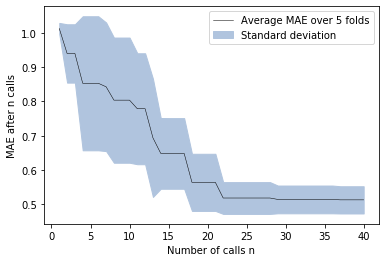

In [40]:
def plot_convergence(dataframe, n_calls):

    # x values
    x = list(range(1, n_calls + 1))
    
    # y values
    cumltv_MAE = [dataframe.loc[dataframe['Fold'] == fold, 'MAE/MAD'].tolist()
                   for fold in range(1, 6)]
    cumltv_MAE = list(zip(*cumltv_MAE))   
    y = [statistics.mean(call) for call in cumltv_MAE]
    
    # standard devation
    stdev = [statistics.stdev(call) for call in cumltv_MAE]
    
    # standard devation bounds
    y1 = [i - sd for i, sd in zip(y, stdev)]
    y2 = [i + sd for i, sd in zip(y, stdev)]
    
    # plot mean line
    line = plt.plot(x, 
             y, 
             color='black', 
             linewidth=0.5, 
                    label='Average MAE over 5 folds')
    
    # plot standard deviation bounds
    fill = plt.fill_between(x, 
                     y1, 
                     y2, 
                     fc='lightsteelblue', 
                            ec='lightsteelblue', 
                            label='Standard deviation')
    
    plt.xlabel('Number of calls n')
    plt.ylabel('MAE after n calls')

    plt.legend()


plot_convergence(cumulative_MAE_df, 40)

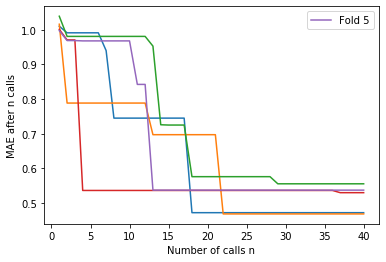

In [41]:
def plot_individual_convergence(dataframe, fold, n_calls):

    x = list(range(1, n_calls + 1))
    y = dataframe.loc[dataframe['Fold'] == fold]
    y = y['MAE/MAD'].tolist()

    line = plt.plot(x, y, label='Fold {}'.format(fold))
    
    plt.xlabel('Number of calls n')
    plt.ylabel('MAE after n calls')
    
    plt.legend(handles=line)


num_folds = range(1, 6)  # 5 folds
for fold in num_folds:
    plot_individual_convergence(cumulative_MAE_df, fold, 40)

## External testing

### Per SVR model

In [42]:
def svr_predict(model_num, test_set):

    with open(output_dr + '/fold_' + str(model_num) + '_SVM_model.svm', 'rb') as file:
        model = pickle.load(file)
    
    return model.predict(test_set)


def calc_mae(dataframe, model):

    model_df = dataframe.loc[dataframe['Model number'] == model]
    abs_err = model_df['Absolute error (kcal/mol)'].tolist()
    MAE = statistics.mean(abs_err)
    
    return MAE


# load in testing set
# note: test_df defined previously in section 5.3
test_ID = test_df.index
test_X = test_df.drop(columns='dGoffset (kcal/mol)').values
test_y = test_df['dGoffset (kcal/mol)'].values

# empty df for external testing results
test_rst = pd.DataFrame()

# peform prediction using each model
num_models = num_folds

for model in num_models:
    
    # call SVR prediction function
    svr_rst = svr_predict(model, test_X)
    
    # write results per fold into dictionary and load into df
    model_rst = {}
    model_rst['ID'] = test_ID
    model_rst['Model number'] = [model for i in range(41)]
    model_rst['Experimental dGoffset (kcal/mol)'] = test_y
    model_rst['Predcted dGoffset (kcal/mol)'] = svr_rst
    model_rst['Absolute error (kcal/mol)'] = abs(test_y - svr_rst)

    test_rst = pd.concat([test_rst, pd.DataFrame(model_rst)])


# calculate MAE values
MAE_lst = [calc_mae(test_rst, model) for model in num_models]
print('MAE values between experimental and predicted dGoffset values:\n')
for model, model_MAE in enumerate(MAE_lst):
    print('Model {} MAE: {} kcal/mol'.format(model + 1, round(model_MAE, 2)))
print('\nAverage MAE: {} kcal/mol'.format(round(statistics.mean(MAE_lst), 2)))


test_rst = test_rst.round(2)
test_rst

MAE values between experimental and predicted dGoffset values:

Model 1 MAE: 0.9 kcal/mol
Model 2 MAE: 0.91 kcal/mol
Model 3 MAE: 0.99 kcal/mol
Model 4 MAE: 1.03 kcal/mol
Model 5 MAE: 0.97 kcal/mol

Average MAE: 0.96 kcal/mol


,ID,Model number,Experimental dGoffset (kcal/mol),Predcted dGoffset (kcal/mol),Absolute error (kcal/mol)
0,mobley_486214,1,0.43,-0.35,0.78
1,mobley_5003962,1,2.36,1.07,1.29
2,mobley_2972345,1,0.52,0.92,0.40
3,mobley_6935906,1,0.47,1.25,0.78
4,mobley_6195751,1,1.17,-0.88,2.05
...,...,...,...,...,...
36,mobley_7676709,5,-0.68,0.21,0.89
37,mobley_5917842,5,-1.25,-0.67,0.58
38,mobley_5616693,5,0.99,0.77,0.22
39,mobley_4587267,5,-5.46,-6.57,1.11


### Averaged over all models

In [43]:
# average predicted offset values
prdt_offsets = [test_rst.loc[test_rst['Model number'] == model, 'Predcted dGoffset (kcal/mol)'].tolist()
                   for model in num_models]
prdt_offsets = list(zip(*prdt_offsets))
avg_offsets = [statistics.mean(offset_set) for offset_set in prdt_offsets]

# write results to df
avg_rst = {}

avg_rst['ID'] = test_ID
avg_rst['Experimental dGoffset (kcal/mol)'] = test_y
avg_rst['Averaged predcted dGoffset (kcal/mol)'] = avg_offsets
avg_rst['Absolute error (kcal/mol)'] = abs(test_y - avg_offsets)

avg_rst_df = pd.DataFrame(avg_rst)

# MAE
print('MAE between experimental and averaged predicted dGoffsets:')
test_offset_MAE = round(statistics.mean(abs(test_y - avg_offsets)), 2)
print('MAE: {} kcal/mol'.format(test_offset_MAE))

avg_rst_df = avg_rst_df.round(2)
avg_rst_df

MAE between experimental and averaged predicted dGoffsets:
MAE: 0.9 kcal/mol


,ID,Experimental dGoffset (kcal/mol),Averaged predcted dGoffset (kcal/mol),Absolute error (kcal/mol)
0,mobley_486214,0.43,-0.33,0.76
1,mobley_5003962,2.36,1.06,1.30
2,mobley_2972345,0.52,0.98,0.46
3,mobley_6935906,0.47,1.59,1.12
4,mobley_6195751,1.17,-0.71,1.88
5,mobley_3802803,-0.06,-0.22,0.16
6,mobley_3265457,0.51,-0.65,1.16
7,mobley_3040612,-0.09,-0.24,0.15
8,mobley_1160109,-0.41,-0.03,0.38
9,mobley_6102880,-0.06,0.25,0.31


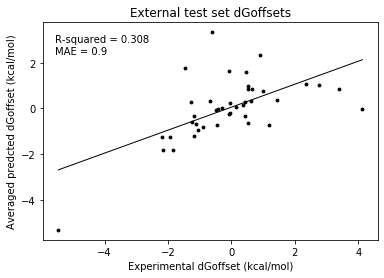

In [44]:
plot_scatter(avg_rst_df, 
        [1, 'Experimental dGoffset (kcal/mol)'], 
        [2, 'Averaged predcted dGoffset (kcal/mol)'], 
             title='External test set dGoffsets', 
             MAE=test_offset_MAE)

## Corrected hydration free energies

In [45]:
# SAMPL4 Gurthrie df
test_fs_df = freesolv_df.loc[freesolv_df.iloc[:, 7] == 'SAMPL4_Guthrie']

# experimental dGhydr
test_exp = test_fs_df.iloc[:, 3]

# calculated dGhydr
test_calc = test_fs_df.iloc[:, 5].tolist()

# calculated dGhydr uncertainty
test_calc_err = test_fs_df.iloc[:, 6].tolist()

# corrected calculated Ghydr using predicted dGoffsets
corr_calc = [calc + err for calc, err in zip(test_calc, avg_offsets)]

# calculated dGhydr absolute error
calc_AE = [abs(exp - calc) for exp, calc in zip(test_exp, test_calc)]

# corrected calculated dGhydr propogated absolute error
# corr_AE = (err1**2 + err2**2)**0.5
corr_AE = [abs(exp - calc) for exp, calc in zip(test_exp, corr_calc)]

# create df
corr_dict = {'ID': test_ID, 
             'Experimental dGhydr (kcal/mol)': test_exp, 
             'Calculated dGhydr (kcal/mol)': test_calc, 
             'Calculated dGhydr absolute error (kcal/mol)': calc_AE,  
             'Corrected calculated dGhydr (kcal/mol)': corr_calc, 
             'Corrected calculated dGhydr absolute error (kcal/mol)': corr_AE}

corr_df = pd.DataFrame(corr_dict).round(2)

# calculate MAEs
calc_MAE = statistics.mean(calc_AE)
print('Mobley calculated MAE: {} kcal/mol'.format(round(calc_MAE, 2)))
corr_MAE = statistics.mean(corr_AE)
print('Corrected calculated MAE: {} kcal/mol'.format(round(corr_MAE, 2)))

corr_df

Mobley calculated MAE: 1.17 kcal/mol
Corrected calculated MAE: 1.66 kcal/mol


,ID,Experimental dGhydr (kcal/mol),Calculated dGhydr (kcal/mol),Calculated dGhydr absolute error (kcal/mol),Corrected calculated dGhydr (kcal/mol),Corrected calculated dGhydr absolute error (kcal/mol)
10,mobley_486214,-3.75,-3.34,0.41,-3.67,0.08
79,mobley_5003962,-9.34,-7.87,1.47,-6.81,2.53
98,mobley_2972345,-5.66,-4.77,0.89,-3.79,1.87
113,mobley_6935906,-14.21,-13.60,0.61,-12.01,2.20
123,mobley_6195751,-11.85,-15.25,3.40,-15.96,4.11
140,mobley_3802803,-5.33,-4.05,1.28,-4.27,1.06
141,mobley_3265457,-4.80,-5.32,0.52,-5.97,1.17
162,mobley_3040612,-4.68,-8.81,4.13,-9.05,4.37
173,mobley_1160109,-3.78,-4.30,0.52,-4.33,0.55
180,mobley_6102880,-0.85,-0.76,0.09,-0.51,0.34


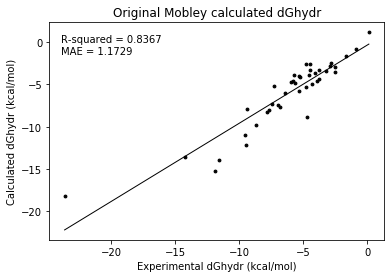

In [46]:
plot_scatter(corr_df, 
        [1, 'Experimental dGhydr (kcal/mol)'], 
        [2, 'Calculated dGhydr (kcal/mol)'], 
             title='Original Mobley calculated dGhydr', 
             MAE=calc_MAE)

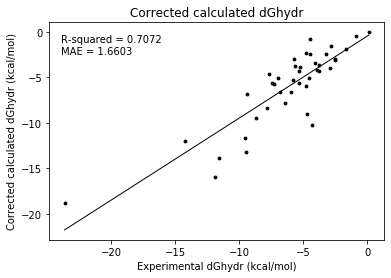

In [47]:
plot_scatter(corr_df, 
        [1, 'Experimental dGhydr (kcal/mol)'], 
        [4, 'Corrected calculated dGhydr (kcal/mol)'], 
             title='Corrected calculated dGhydr', 
             MAE=corr_MAE)

## Determining high absolute errors

In [48]:
def draw_structure_panel(sdf_suppl, legend):
    'Draw RDKit.Draw in panel format.'

    suppl = [SDMolSupplier(sdf) for sdf in sdf_suppl]
    mols = [x[0] for x in suppl if x is not None]
    for mol in mols:
        tmp = AllChem.Compute2DCoords(mol)
    
    return Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(200, 200), legends=legend)    

$$ \Delta{G_{offset}} = \Delta{G_{exp}} - \Delta{G_{calc}} $$
$$ \Rightarrow \Delta{G_{offset}} = \Delta{G_{corrected}} - \Delta{G_{calc}} $$
$$ \Rightarrow \Delta{G_{corrected}} = \Delta{G_{calc}} + \Delta{G_{offset}} $$

### Tanimoto Coefficient

$$ T_{a,b}=\frac{M_{a,b}}{M_{a}+M_{b}+M_{a,b}} $$
$$ M_{a}=single test set ligand 1D feature list $$
$$ M_{b}=validation set feature list $$
$$ M_{a,b}= $$

In [49]:
# For each training/validation
#       for each test set molecule
#            compute distribution of Tanimoto to training and validation
#            Plot average distribution tanimoto test to training and compare average distrib validation to training
# Check for trends in training/validation correction improvements

# for fold in kfolds:
#     for training, validation in fold:
#         for test in test_set:
            

In [50]:
def tanimoto(list1, list2):
  intersection = [common_item for common_item in list1 if common_item in list2]
  return float(len(c))/(len(a) + len(b) - len(c))

In [51]:
# list of test SDF paths from section 5.3.2
new_test_sdf = [absolute_dGoffset_path + 'test_dr/' + sdf
               for sdf in test_sdf]

corr_AE = corr_df.iloc[:, 5].tolist()
corr_AE = [str(x) for x in corr_AE]

# draw_structure_panel(new_test_sdf, corr_AE)

### Absolute error < 1.00

17 structures have dGhydr absolute erros < 1.00 kcal/mol


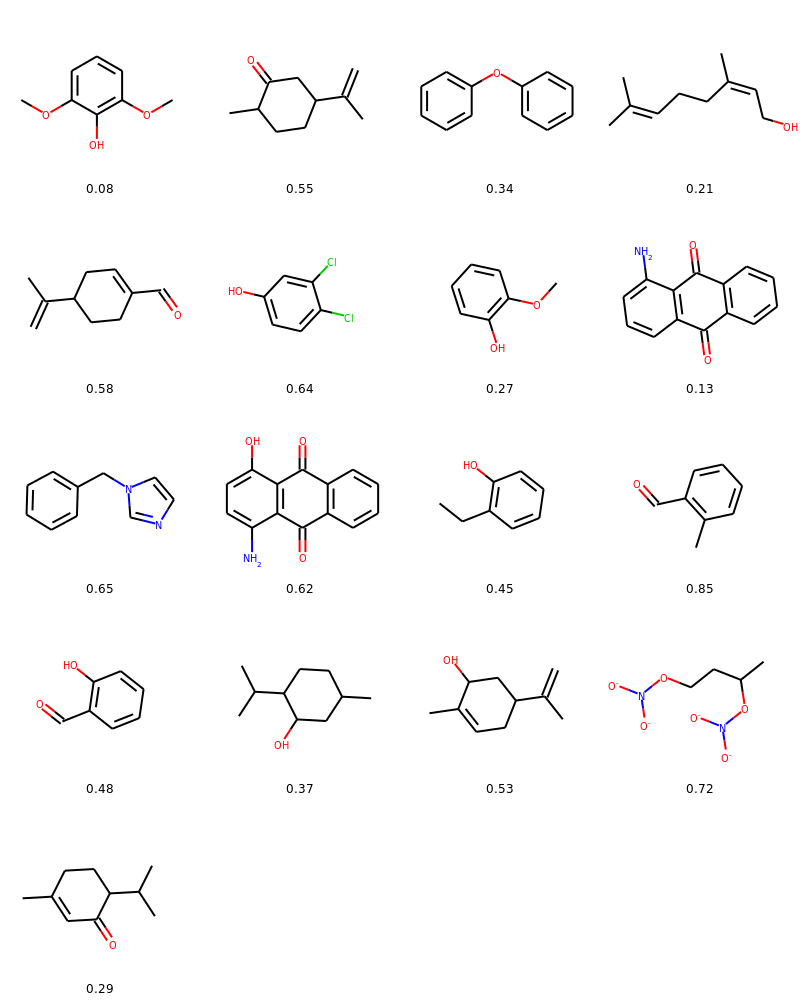

In [52]:
# df containing entries with corrected calculated dGhydr absolute errors < 1.00
below_one_df = corr_df.loc[corr_df['Corrected calculated dGhydr absolute error (kcal/mol)'] < 1.00]

# sdf paths
below_one_sdf = [absolute_dGoffset_path + 'test_dr/' + sdf + '.sdf'
                for sdf in below_one_df['ID']]

# Actual absolute error values
below_one_AE = [str(x) for x in below_one_df['Corrected calculated dGhydr absolute error (kcal/mol)']]

print(len(below_one_df), 'structures have dGhydr absolute erros < 1.00 kcal/mol')
draw_structure_panel(below_one_sdf, below_one_AE)

### 1.00 < absolute error < 2.00

11 structures have dGhydr 1.00 < absolute erros < 2.00 kcal/mol


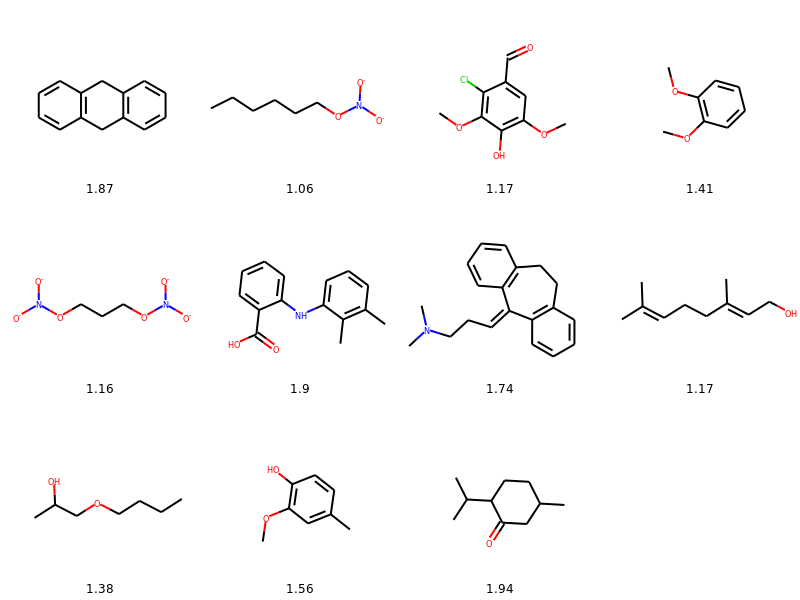

In [53]:
# df containing entries with corrected calculated dGhydr 1.00 < absolute errors < 2.00
between_1and2_df = corr_df.loc[corr_df['Corrected calculated dGhydr absolute error (kcal/mol)'] < 2.00]
between_1and2_df = between_1and2_df.loc[between_1and2_df['Corrected calculated dGhydr absolute error (kcal/mol)'] > 1.00]

# sdf paths
between_1and2_sdf = [absolute_dGoffset_path + 'test_dr/' + sdf + '.sdf'
                for sdf in between_1and2_df['ID']]

# Actual absolute error values
between_1and2_AE = [str(x) for x in between_1and2_df['Corrected calculated dGhydr absolute error (kcal/mol)']]

print(len(between_1and2_df), 'structures have dGhydr 1.00 < absolute erros < 2.00 kcal/mol')
draw_structure_panel(between_1and2_sdf, between_1and2_AE)

### Absolute error > 2.00

13 structures have dGhydr absolute erros > 2.00 kcal/mol


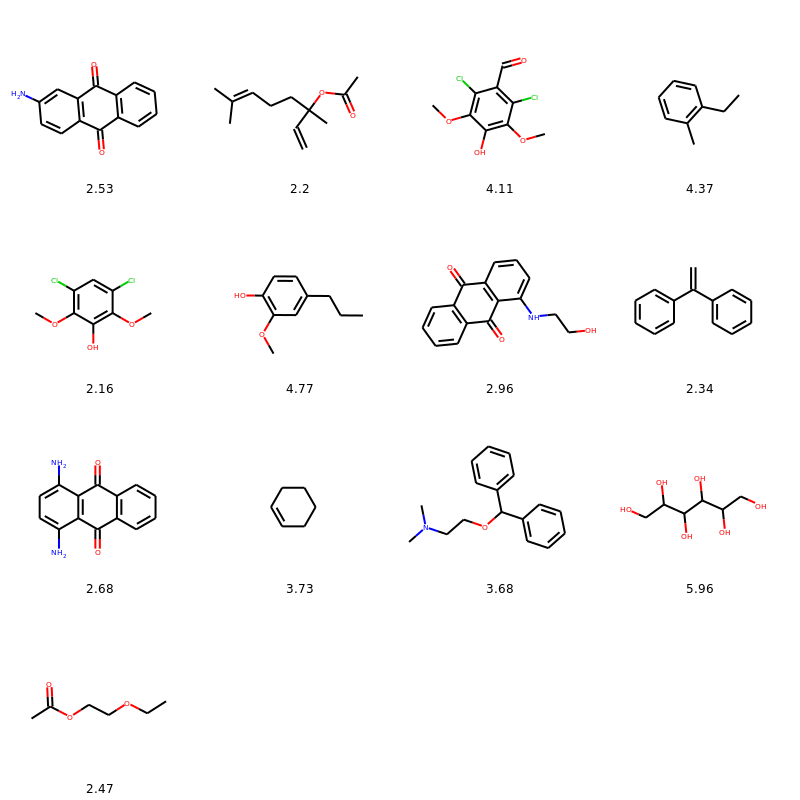

In [54]:
# df containing entries with corrected calculated dGhydr absolute errors > 2.00
above_2_df = corr_df.loc[corr_df['Corrected calculated dGhydr absolute error (kcal/mol)'] > 2.00]

# sdf paths
above_2_sdf = [absolute_dGoffset_path + 'test_dr/' + sdf + '.sdf'
                for sdf in above_2_df['ID']]

# Actual absolute error values
above_2_AE = [str(x) for x in above_2_df['Corrected calculated dGhydr absolute error (kcal/mol)']]

print(len(above_2_df), 'structures have dGhydr absolute erros > 2.00 kcal/mol')
draw_structure_panel(above_2_sdf, above_2_AE)